In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw

# Задание 8.1
Загрузить библиотеку numpy, файл bin.jpg и преобразовать его с помощью операций дилатация и эрозия. Выбрать ядро, размер которого равен последней цифре в номере списка группы. Выполним сначала операцию дилатации, затем и эрозии.

In [2]:
img = cv2.imread('images/sun.png', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Сначала создадим ядро (Я не знаю какая последняя цифра с номере списка группы, поэтому написал 7)

In [3]:
kernel = np.ones((7, 7), np.uint8)

Теперь выполним операции дилатации и эрозии с помощью функций cv2.dilatate и cv2.erode соответственно

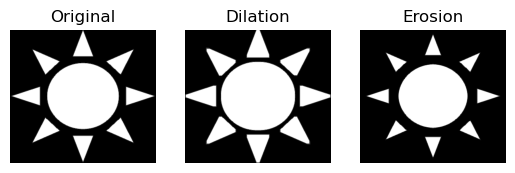

In [4]:
dilation = cv2.dilate(img, kernel, iterations = 1)
erosion = cv2.erode(img, kernel, iterations = 1)

plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.subplot(132), plt.imshow(dilation), plt.title('Dilation')
plt.axis('off')
plt.subplot(133), plt.imshow(erosion), plt.title('Erosion')
plt.axis('off')
plt.show();

# Задание 8.2 
Для демонстрации удаления шума создать зашумленный файл, затем к зашумленному файлу применить операцию открытия.

Создадим фотокарточку с шумами:

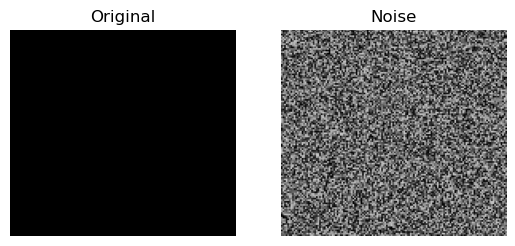

In [5]:
image = Image.open('images/dark.jpg')

plt.subplot(121), plt.imshow(image), plt.title('Original')
plt.axis('off')

draw = ImageDraw.Draw(image) 

width = image.size[0]
height = image.size[1]

pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 200)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
        
image.save("images/median.png", "JPEG")

plt.subplot(122), plt.imshow(image), plt.title('Noise')
plt.axis('off')
plt.show();

Теперь применим операции открытия c помощью функции cv2.morphologyEx и аргументами cv2.MORPH_OPEN

Открытие – это комбинация операций эрозии, за которой следует расширение. Размыкание сглаживает контуры объекта, обрывает узкие перешейки и ликвидирует выступы небольшой ширины.

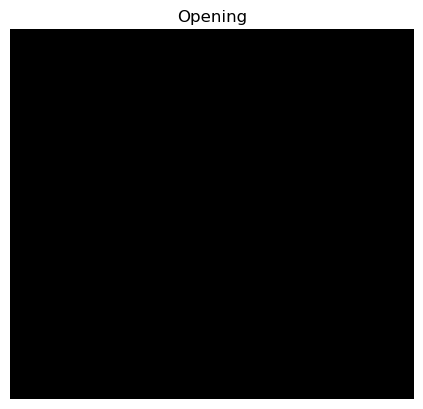

In [6]:
img = cv2.imread('images/median.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(opening), plt.title('Opening')
plt.axis('off')
plt.show();

# Задание 8.3
Трансформировать цветное изображение в полутоновое при его загрузке, к полутоновому файлу применить операцию открытия.

Замыкание также сглаживает участки контура, но в отличие от размыкания «заливает» узкие разрывы и углубления малой ширины, ликвидирует небольшие отверстия или маленькие черные точки на объекте.

Закрытие (замыкание) – это комбинация операций: сначала расширение потом эрозия.

In [7]:
img = cv2.imread('images/star.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))

Как и для операции открытия, применим функцию cv2.morphologyEx, только с аргументом cv2.MORPH_CLOSE

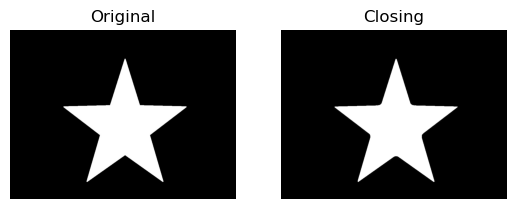

In [8]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(closing), plt.title('Closing')
plt.axis('off')
plt.show();

# Задание 8.4
Трансформировать цветное изображение в полутоновое при его загрузке. Скопировать полутоновое изображение.
К первому изображению применить операцию расширения, ко второму эрозию. Затем вычесть из расширенного изображения изображение после эрозии. Результат похож на контур объекта.

In [9]:
img = cv2.imread('images/bmw.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = img.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

dilation = cv2.dilate(img, kernel, iterations = 1)
erosion = cv2.erode(img1, kernel, iterations = 1)

Теперь остало вычесть из расширенного изображения изображение после эрозии:

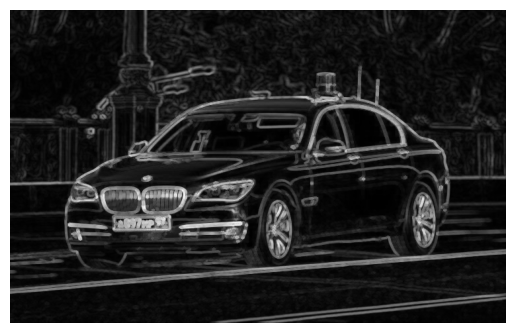

In [10]:
result = dilation - erosion
plt.axis('off')
plt.imshow(result);

# Задание 8.5
Применить операцию цилиндр к изображению, размер ядра равен 40 + No, No – номер по списку группы.

Цилиндр - это разность между входным набором изображения и его открытием

In [11]:
img = cv2.imread('images/star.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Размер ядра 40 + 18 = 58. Операцию цилиндр применим с помощью функции cv2.morphologyEx() с аргументом cv2.MORPH_TOPHAT

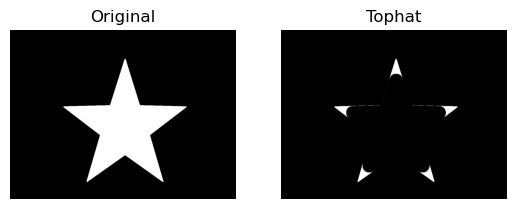

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (58, 58))
result = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(result), plt.title('Tophat')
plt.axis('off')
plt.show();

# Задание 8.6
Применить операцию черная шляпа к изображению, размер ядра равен 40 + No, No – номер по списку группы.

Чёрная шляпа - это разница между закрытием входного изображения и входным изображением.

In [13]:
img = cv2.imread('images/star.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Размер ядра 40 + 18 = 58. Операцию цилиндр применим с помощью функции cv2.morphologyEx() с аргументом cv2.MORPH_BLACKHAT

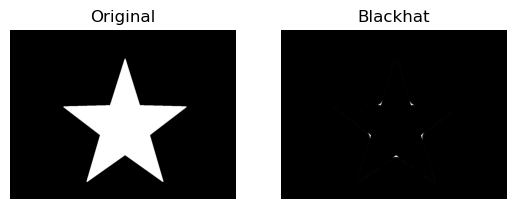

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (58, 58))
result = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(result), plt.title('Blackhat')
plt.axis('off')
plt.show();

# Задание 8.7
Изготовить ядро, его размер выбрать из ряда 3x3,
3x5, 5x3, 5x5, 5x7, 3x7, 7x3, 7x5, 5x7, 7x7, номер варианта должен быть равен номеру по списку группы. Обработать изображение с помощью выбранного ядра и ядра размером 9x9. Сравнить результаты обработки изображения этими ядрами.

In [15]:
img = cv2.imread('images/lexus.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Мой вариант - 18. Это ядро 7x5

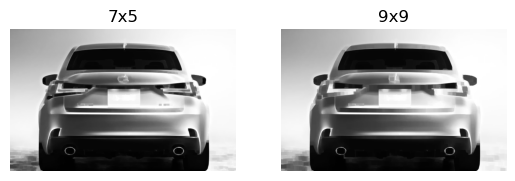

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 5))
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
result1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)

plt.subplot(121), plt.imshow(result), plt.title('7x5')
plt.axis('off')
plt.subplot(122), plt.imshow(result1), plt.title('9x9')
plt.axis('off')
plt.show();